In [1]:
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")   # for ignoring any warning

### Reading all files and storing in variables as dataframes

In [2]:
booknow_booking=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv')
cinePOS_booking=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv')
mapping=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv')
booknow_thea=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv')
cinePOS_thea=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv')
booknow_visit=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv')
date_info=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv')

sample=pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv')

### ----------Milestone 1--------

In [3]:
"""
#Q1 What is the shape of the dataset named booknow_booking?

booknow_booking.shape
"""

'\n#Q1 What is the shape of the dataset named booknow_booking?\n\nbooknow_booking.shape\n'

In [4]:
#Q2 How many columns are of type Object in the dataset named cinePOS_theaters?

# cinePOS_thea.info()


In [5]:
#Q3 Which theater types is the most frequent in the dataset named booknow_theaters?

#booknow_thea['theater_type'].value_counts()

In [6]:
#Q4 How many distinct theaters are present in the dataset named cinePOS_booking?

# len(cinePOS_booking['cine_theater_id'].unique())

In [7]:
#Q5 Combine the datasets booknow_booking and booknow_theaters. What is the shape of this dataset?

# Inner join on book_theater_id
#combined_df = booknow_booking.merge(booknow_thea, on="book_theater_id", how="inner")

# Shape of the combined dataset
#print(combined_df.shape)

In [8]:
#Q6 Based on the combined dataset obtained in the previous question, how many distinct areas are the theaters located in?

#len(combined_df['theater_area'].unique())

In [9]:
#Q7 Combine the datasets movie_theater_id_relation, cinePOS_booking and cinePOS_theaters. Enter the column names containing missing values as comma seperated values.



#c_d1=mapping.merge(cinePOS_booking,on='cine_theater_id',how='inner')
#c_d2=c_d1.merge(cinePOS_thea,on='cine_theater_id',how='inner')

#c_d2.isna().sum()

# answer is (latitude,longitude)

In [10]:
#Q8 Enter the date range spanned in the dataset named booknow_booking. 

# Hint: Find the earliest and latest date for which data is available in this dataset. 

#date_range = f"{pd.to_datetime(booknow_booking['booking_datetime']).min().strftime('%d-%m-%Y')} to {pd.to_datetime(booknow_booking['booking_datetime']).max().strftime('%d-%m-%Y')}"
#print(date_range)

In [11]:
#Q9 Enter the date range spanned in the test dataset (sample_submission).
# Note: Enter the answer as "dd-mm-yyyy to dd-mm-yyyy". 

#from copy import deepcopy
#formatted_sample=deepcopy(sample)
#formatted_sample['Date']=[i[11:] for i in sample['ID']]
#date_range = f"{pd.to_datetime(formatted_sample['Date']).min().strftime('%d-%m-%Y')} to {pd.to_datetime(formatted_sample['Date']).max().strftime('%d-%m-%Y')}"
#print(date_range)

### --------Milestone 1 ends -------------

# ------Milestone 2---------------

In [12]:
"""
# Q1

# In the booknow_booking.csv file, how many total booking records (rows) were made on the same calendar day as the show's date?

# Note: The question refers to day / date and not datetime


booknow_booking['show_datetime']=pd.to_datetime(booknow_booking['show_datetime'])
booknow_booking['booking_datetime']=pd.to_datetime(booknow_booking['booking_datetime'])

booknow_booking['show_date']=booknow_booking['show_datetime'].dt.date
booknow_booking['booking_date']=booknow_booking['booking_datetime'].dt.date


print(booknow_booking[booknow_booking['show_date']==booknow_booking['booking_date']].shape[0])
"""

"\n# Q1\n\n# In the booknow_booking.csv file, how many total booking records (rows) were made on the same calendar day as the show's date?\n\n# Note: The question refers to day / date and not datetime\n\n\nbooknow_booking['show_datetime']=pd.to_datetime(booknow_booking['show_datetime'])\nbooknow_booking['booking_datetime']=pd.to_datetime(booknow_booking['booking_datetime'])\n\nbooknow_booking['show_date']=booknow_booking['show_datetime'].dt.date\nbooknow_booking['booking_date']=booknow_booking['booking_datetime'].dt.date\n\n\nprint(booknow_booking[booknow_booking['show_date']==booknow_booking['booking_date']].shape[0])\n"

In [13]:
"""
# Q2

# How many unique calendar months (e.g., Jan 2023, Feb 2023, ...) are present in the show_date column of the date_info.csv file?

date_info['show_date']=pd.to_datetime(date_info['show_date'])
date_info['month_year']=date_info['show_date'].dt.strftime('%B %Y')
"""

"\n# Q2\n\n# How many unique calendar months (e.g., Jan 2023, Feb 2023, ...) are present in the show_date column of the date_info.csv file?\n\ndate_info['show_date']=pd.to_datetime(date_info['show_date'])\ndate_info['month_year']=date_info['show_date'].dt.strftime('%B %Y')\n"

In [14]:
# len(date_info['month_year'].unique())

In [15]:
"""
# Q 3

# What percentage of bookings in booknow_booking.csv were made on a Sunday?

booknow_booking['booking_date']=pd.to_datetime(booknow_booking['booking_date'])
booknow_booking['booking_day_of_week']=booknow_booking['booking_date'].dt.day_name()
a=booknow_booking[booknow_booking['booking_day_of_week']=="Sunday"]['tickets_booked'].sum()
b=booknow_booking['tickets_booked'].sum()
print(a/b)
"""

'\n# Q 3\n\n# What percentage of bookings in booknow_booking.csv were made on a Sunday?\n\nbooknow_booking[\'booking_date\']=pd.to_datetime(booknow_booking[\'booking_date\'])\nbooknow_booking[\'booking_day_of_week\']=booknow_booking[\'booking_date\'].dt.day_name()\na=booknow_booking[booknow_booking[\'booking_day_of_week\']=="Sunday"][\'tickets_booked\'].sum()\nb=booknow_booking[\'tickets_booked\'].sum()\nprint(a/b)\n'

In [16]:
# Q4

"""In the booknow_theaters.csv file, if you decided to impute any missing latitude values by the 
mean latitude of only theaters with theater_type equal to Drama, what would be the imputation value?"""

#booknow_thea[booknow_thea['theater_type']=='Drama']['latitude'].mean()

'In the booknow_theaters.csv file, if you decided to impute any missing latitude values by the \nmean latitude of only theaters with theater_type equal to Drama, what would be the imputation value?'

In [17]:
"""
# Q5

What is the range (Maximum - Minimum) of the latitude column in the booknow_theaters.csv file 
(rounded to 4 decimal places)?

round((booknow_thea['latitude'].max()-booknow_thea['latitude'].min()),4)
"""

"\n# Q5\n\nWhat is the range (Maximum - Minimum) of the latitude column in the booknow_theaters.csv file \n(rounded to 4 decimal places)?\n\nround((booknow_thea['latitude'].max()-booknow_thea['latitude'].min()),4)\n"

In [18]:
# Q6

"""To handle potential outliers in ticket sales, you decide to cap the tickets_sold column in cinePOS_booking.csv 
at the 95 th  percentile. Enter that value."""

#import numpy as np
#np.quantile(cinePOS_booking['tickets_sold'],0.95)

'To handle potential outliers in ticket sales, you decide to cap the tickets_sold column in cinePOS_booking.csv \nat the 95 th  percentile. Enter that value.'

In [19]:
# Q7

"""Appy OneHot Encoding on all the categorical columns of the dataset cinePOS_theaters.csv. 
What is the shape of the dataset 
after applying this transformation?

Note: The result obtained highlights a potential drawback of OneHot encoding. 
Read about other forms of encoding and the advantages / disadvantages they offer."""

#cinePOS_encoded = pd.get_dummies(cinePOS_thea, drop_first=False)
#cinePOS_encoded.shape

'Appy OneHot Encoding on all the categorical columns of the dataset cinePOS_theaters.csv. \nWhat is the shape of the dataset \nafter applying this transformation?\n\nNote: The result obtained highlights a potential drawback of OneHot encoding. \nRead about other forms of encoding and the advantages / disadvantages they offer.'

### -------------Milestone 2 ends-----------------

### ------------Milestone 3------------

In [20]:
"""For this milestone, only the booknow_visits.csv file is to be used. Using the show_date column, create new columns for day, month, year and dayofyear. Once the new columns are created, drop the show_date column

Split the data into X & y with the target variable audience_count as y and the remaining features as X. 

Split the dataset so that 20% of it is kept for validation. Ensure the split preserves the time series nature of the dataset. This data will be referred to as X_train, X_test and y_train, y_test
"""

#booknow_visit_copy=deepcopy(booknow_visit)
#booknow_visit_copy['show_date']=pd.to_datetime(booknow_visit_copy['show_date'])
#booknow_visit_copy['day']=booknow_visit_copy['show_date'].dt.day
#booknow_visit_copy['month']=booknow_visit_copy['show_date'].dt.month
#booknow_visit_copy['year']=booknow_visit_copy['show_date'].dt.year
#booknow_visit_copy['dayofyear']=booknow_visit_copy['show_date'].dt.day_of_year

'For this milestone, only the booknow_visits.csv file is to be used. Using the show_date column, create new columns for day, month, year and dayofyear. Once the new columns are created, drop the show_date column\n\nSplit the data into X & y with the target variable audience_count as y and the remaining features as X. \n\nSplit the dataset so that 20% of it is kept for validation. Ensure the split preserves the time series nature of the dataset. This data will be referred to as X_train, X_test and y_train, y_test\n'

In [21]:
# booknow_visit_copy.drop(columns=['show_date'],inplace=True)

In [22]:
"""
X=booknow_visit_copy.drop(columns=['audience_count'])
y=booknow_visit_copy['audience_count']
"""

"\nX=booknow_visit_copy.drop(columns=['audience_count'])\ny=booknow_visit_copy['audience_count']\n"

In [23]:
"""
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=False,test_size=0.2)
"""

'\nfrom sklearn.model_selection import train_test_split\nX_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=False,test_size=0.2)\n'

In [24]:
# X_train.shape

In [25]:
# Q2
"""Use MinMaxScaler for the numerical columns & OneHotEncoding for the categorical columns. These transformations are to be applied on both the train & test datasets. 
Answer all the questions that follow."""

"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

numeric_cols = ['day','month','year','dayofyear']
categorical_cols = ['book_theater_id']

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared  = preprocessor.transform(X_test)
"""

"\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder, MinMaxScaler\n\nnumeric_cols = ['day','month','year','dayofyear']\ncategorical_cols = ['book_theater_id']\n\npreprocessor = ColumnTransformer([\n    ('num', MinMaxScaler(), numeric_cols),\n    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)\n])\n\nX_train_prepared = preprocessor.fit_transform(X_train)\nX_test_prepared  = preprocessor.transform(X_test)\n"

In [26]:
"""
scale=MinMaxScaler()
y_train_scaled=scale.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
y_test_scaled=scale.transform(np.array(y_test).reshape(-1,1)).ravel()
"""

'\nscale=MinMaxScaler()\ny_train_scaled=scale.fit_transform(np.array(y_train).reshape(-1,1)).ravel()\ny_test_scaled=scale.transform(np.array(y_test).reshape(-1,1)).ravel()\n'

In [27]:
#print(X_train_prepared.shape)
#print(y_train_scaled.shape)

In [28]:
#print(type(X_train_prepared))
#print(type(y_train_scaled))

In [29]:
#from sklearn.svm import LinearSVR
#model=LinearSVR()
#model.fit(X_train_prepared,y_train_scaled)

In [30]:
#from sklearn.metrics import r2_score
#y_pred=model.predict(X_test_prepared)
#r2_score(y_test_scaled,y_pred)

# this is the answer to qustion 2

In [31]:
"""
# Q3

from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Build pipeline
svr_pipeline = make_pipeline(
    TruncatedSVD(n_components=4),
    #LinearSVR(random_state=42, max_iter=10000)
    LinearSVR()
)
"""

'\n# Q3\n\nfrom sklearn.metrics import mean_absolute_error\nfrom sklearn.decomposition import TruncatedSVD\nfrom sklearn.pipeline import make_pipeline\n\n# Build pipeline\nsvr_pipeline = make_pipeline(\n    TruncatedSVD(n_components=4),\n    #LinearSVR(random_state=42, max_iter=10000)\n    LinearSVR()\n)\n'

In [32]:
# train the model
# svr_pipeline.fit(X_train_prepared,y_train_scaled)

In [33]:
"""
yy=svr_pipeline.predict(X_train_prepared)
mean_absolute_error(y_train_scaled,yy)

# this is the answer to q3
"""

'\nyy=svr_pipeline.predict(X_train_prepared)\nmean_absolute_error(y_train_scaled,yy)\n\n# this is the answer to q3\n'

In [34]:
# q4

#yy1=svr_pipeline.predict(X_test_prepared)
#r2_score(y_test_scaled,yy1)

In [35]:
# q5 

# Use SelectKBest with k = 2 , score_func = mutual_info_regression.  
# Based on attributes output by SelectKBest, what is the maximum score obtained?

#from sklearn.feature_selection import SelectKBest, mutual_info_regression

#selector=SelectKBest(score_func=mutual_info_regression, k=2)

In [36]:
# selector.fit(X_train_prepared,y_train_scaled)

In [37]:
#max_score=selector.scores_.max()
#print(max_score)

In [38]:
# q6

#selector.scores_.mean()

In [39]:
"""
print(X_train_prepared.shape)
print("\n")
print(X_test_prepared.shape)
print("*"*50)
print(y_train_scaled.shape)
print("\n")
print(y_test_scaled.shape)
"""

'\nprint(X_train_prepared.shape)\nprint("\n")\nprint(X_test_prepared.shape)\nprint("*"*50)\nprint(y_train_scaled.shape)\nprint("\n")\nprint(y_test_scaled.shape)\n'

### -----------Milestone 3 ends here --------

### -------Milestone 4-------------------

In [40]:
# from copy import deepcopy

"""
For this milestone, only the booknow_visits.csv file is to be used. Using the show_date column, create new columns for day, month, year and dayofyear. Once the new columns are created, drop the show_date column

Split the data into X & y with the target variable audience_count as y and the remaining features as X. 

Split the dataset so that 20% of it is kept for validation. Ensure the split preserves the time series nature of the dataset. This data will be referred to as X_train, X_test and y_train, y_test

Use MinMaxScaler for the numerical columns & OneHotEncoding for the categorical columns. These transformations are to be applied on both the train & test datasets. Answer all the questions that follow.
"""

'\nFor this milestone, only the booknow_visits.csv file is to be used. Using the show_date column, create new columns for day, month, year and dayofyear. Once the new columns are created, drop the show_date column\n\nSplit the data into X & y with the target variable audience_count as y and the remaining features as X. \n\nSplit the dataset so that 20% of it is kept for validation. Ensure the split preserves the time series nature of the dataset. This data will be referred to as X_train, X_test and y_train, y_test\n\nUse MinMaxScaler for the numerical columns & OneHotEncoding for the categorical columns. These transformations are to be applied on both the train & test datasets. Answer all the questions that follow.\n'

In [41]:
"""
booknow_visit_copy=deepcopy(booknow_visit)
booknow_visit_copy['show_date']=pd.to_datetime(booknow_visit_copy['show_date'])
booknow_visit_copy['day']=booknow_visit_copy['show_date'].dt.day
booknow_visit_copy['month']=booknow_visit_copy['show_date'].dt.month
booknow_visit_copy['year']=booknow_visit_copy['show_date'].dt.year
booknow_visit_copy['dayofyear']=booknow_visit_copy['show_date'].dt.day_of_year
"""

"\nbooknow_visit_copy=deepcopy(booknow_visit)\nbooknow_visit_copy['show_date']=pd.to_datetime(booknow_visit_copy['show_date'])\nbooknow_visit_copy['day']=booknow_visit_copy['show_date'].dt.day\nbooknow_visit_copy['month']=booknow_visit_copy['show_date'].dt.month\nbooknow_visit_copy['year']=booknow_visit_copy['show_date'].dt.year\nbooknow_visit_copy['dayofyear']=booknow_visit_copy['show_date'].dt.day_of_year\n"

In [42]:
# booknow_visit_copy.drop(columns=['show_date'],inplace=True)

In [43]:
#X=booknow_visit_copy.drop(columns=['audience_count'])
#y=booknow_visit_copy['audience_count']

In [44]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=False,test_size=0.2)

In [45]:
"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

numeric_cols = ['day','month','year','dayofyear']
categorical_cols = ['book_theater_id']

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared  = preprocessor.transform(X_test)
"""

"\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder, MinMaxScaler\n\nnumeric_cols = ['day','month','year','dayofyear']\ncategorical_cols = ['book_theater_id']\n\npreprocessor = ColumnTransformer([\n    ('num', MinMaxScaler(), numeric_cols),\n    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)\n])\n\nX_train_prepared = preprocessor.fit_transform(X_train)\nX_test_prepared  = preprocessor.transform(X_test)\n"

In [46]:
"""
scale=MinMaxScaler()
y_train_scaled=scale.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
y_test_scaled=scale.transform(np.array(y_test).reshape(-1,1)).ravel()
"""

'\nscale=MinMaxScaler()\ny_train_scaled=scale.fit_transform(np.array(y_train).reshape(-1,1)).ravel()\ny_test_scaled=scale.transform(np.array(y_test).reshape(-1,1)).ravel()\n'

In [47]:
# q1

"""
Train the DecisionTreeRegressor with default 
parameters on X_train. 
What is the r2_score obtained on X_train? 
(upto 3 decimal places)
"""

#from sklearn.tree import DecisionTreeRegressor
#model=DecisionTreeRegressor()
#model.fit(X_train_prepared,y_train_scaled)

'\nTrain the DecisionTreeRegressor with default \nparameters on X_train. \nWhat is the r2_score obtained on X_train? \n(upto 3 decimal places)\n'

In [48]:
#from sklearn.metrics import r2_score
#r2_score(y_train_scaled,model.predict(X_train_prepared))

# this is the answer to Q1

In [49]:
# Q2 
"""
Use the model trained in the previous question 
to predict for X_test. 
What is the r2_score obtained on X_test? (upto 3 decimal places)
"""

#r2_score(y_test_scaled,model.predict(X_test_prepared))

# answer to question 2

'\nUse the model trained in the previous question \nto predict for X_test. \nWhat is the r2_score obtained on X_test? (upto 3 decimal places)\n'

In [50]:
# Q3

"""
Perform Hyper Paramter Tuning for the Decision Tree model. Set random state as 42 and use TimeSeriesSplit with n_splits = 5 for cross validation. 

Hyperparameter tuning is to be done over the following:
- max_depth as [None,3,5,10]
- min_samples_split as [2,5,10]
- min_samples_leaf as [1,2,4]
"""


"""
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
model=DecisionTreeRegressor(random_state=42)
tscv=TimeSeriesSplit(n_splits=5)
param_grid={
    'max_depth':[None,3,5,10],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=tscv,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_prepared, y_train_scaled)
"""

"\nfrom sklearn.model_selection import TimeSeriesSplit, GridSearchCV\nmodel=DecisionTreeRegressor(random_state=42)\ntscv=TimeSeriesSplit(n_splits=5)\nparam_grid={\n    'max_depth':[None,3,5,10],\n    'min_samples_split' : [2,5,10],\n    'min_samples_leaf' : [1,2,4]\n}\n\ngrid_search = GridSearchCV(\n    estimator=model,\n    param_grid=param_grid,\n    cv=tscv,\n    scoring='r2',\n    n_jobs=-1\n)\n\ngrid_search.fit(X_train_prepared, y_train_scaled)\n"

In [51]:
#print("Best Parameters:", grid_search.best_params_)
#print("Best R2 Score:", grid_search.best_score_)

#answer to question 3

In [52]:
# Q4
"""
Train the BaggingRegressor model with 
default parameters on X_train. 
What is the RMSE obtained on X_train? (upto 3 decimal places)
"""

#from sklearn.ensemble import BaggingRegressor
#from sklearn.metrics import mean_squared_error
#model=BaggingRegressor()
#model.fit(X_train_prepared,y_train_scaled)

'\nTrain the BaggingRegressor model with \ndefault parameters on X_train. \nWhat is the RMSE obtained on X_train? (upto 3 decimal places)\n'

In [53]:
#np.sqrt(mean_squared_error(y_train_scaled,model.predict(X_train_prepared)))

# answer to question 4

In [54]:
#np.sqrt(mean_squared_error(y_test_scaled,model.predict(X_test_prepared)))

# answer to question 5

In [55]:
"""
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import BaggingRegressor
model=BaggingRegressor(random_state=42)
param_grid={
     'n_estimators':[10, 50, 100],
     'max_samples':[0.5,0.7,1.0],
     'max_features':[0.5,0.8,1.0]
 }
tscv=TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=tscv,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_prepared,y_train_scaled)
"""

"\nfrom sklearn.model_selection import GridSearchCV, TimeSeriesSplit\nfrom sklearn.ensemble import BaggingRegressor\nmodel=BaggingRegressor(random_state=42)\nparam_grid={\n     'n_estimators':[10, 50, 100],\n     'max_samples':[0.5,0.7,1.0],\n     'max_features':[0.5,0.8,1.0]\n }\ntscv=TimeSeriesSplit(n_splits=5)\ngrid_search = GridSearchCV(\n    estimator=model,\n    param_grid=param_grid,\n    cv=tscv,\n    scoring='r2',\n    n_jobs=-1\n)\n\ngrid_search.fit(X_train_prepared,y_train_scaled)\n"

In [56]:
#print(grid_search.best_score_)
#print(grid_search.best_params_)


# answer to question 6

### -------------Milestone 4 ends--------------

### --------------Milestone 5--------------------------

In [57]:
# Q 1

# Load the file booknow_booking.csv. 
# Extract the date part from show_datetime as a new column show_date.
# Group the data by book_theater_id and show_date, and calculate the 
# total number of tickets booked per theater per day.
# What is the shape of the resulting dataset (number of rows, columns)?

"""
booknow_booking['show_datetime']=pd.to_datetime(booknow_booking['show_datetime'])
booknow_booking['show_date']=booknow_booking['show_datetime'].dt.date

booknow_booking1=booknow_booking.groupby(['book_theater_id','show_date'])['tickets_booked'].sum().reset_index()

booknow_booking1.shape
"""

"\nbooknow_booking['show_datetime']=pd.to_datetime(booknow_booking['show_datetime'])\nbooknow_booking['show_date']=booknow_booking['show_datetime'].dt.date\n\nbooknow_booking1=booknow_booking.groupby(['book_theater_id','show_date'])['tickets_booked'].sum().reset_index()\n\nbooknow_booking1.shape\n"

In [58]:
# Q2: same task as the previous one but with cinePOS booking
"""
cinePOS_booking['show_datetime']=pd.to_datetime(cinePOS_booking['show_datetime'])
cinePOS_booking['show_date']=cinePOS_booking['show_datetime'].dt.date

cinePOS_booking1=cinePOS_booking.groupby(['cine_theater_id','show_date'])['tickets_sold'].sum().reset_index()

cinePOS_booking1.shape
"""

"\ncinePOS_booking['show_datetime']=pd.to_datetime(cinePOS_booking['show_datetime'])\ncinePOS_booking['show_date']=cinePOS_booking['show_datetime'].dt.date\n\ncinePOS_booking1=cinePOS_booking.groupby(['cine_theater_id','show_date'])['tickets_sold'].sum().reset_index()\n\ncinePOS_booking1.shape\n"

In [59]:
# Q3

# Merge the BookNow and CinePOS aggregated datasets 
# (from previous questions) on book_theater_id and show_date 
# using an outer join, with the help of movie_theater_id_relation.csv.

"""
d={}
for elem in range(len(mapping['book_theater_id'])):
    d[mapping['cine_theater_id'][elem]]=mapping['book_theater_id'][elem]
"""

"\nd={}\nfor elem in range(len(mapping['book_theater_id'])):\n    d[mapping['cine_theater_id'][elem]]=mapping['book_theater_id'][elem]\n"

In [60]:
#cinePOS_booking1.rename(columns={'cine_theater_id':'book_theater_id'},inplace=True)

In [61]:
"""
cinePOS_booking1['book_theater_id']=cinePOS_booking1['book_theater_id'].map(d)

df3=booknow_booking1.merge(cinePOS_booking1,on=['book_theater_id','show_date']
                           ,how='outer') # this is the combined booking dataset
df3.shape

"""
# answer to Q3

"\ncinePOS_booking1['book_theater_id']=cinePOS_booking1['book_theater_id'].map(d)\n\ndf3=booknow_booking1.merge(cinePOS_booking1,on=['book_theater_id','show_date']\n                           ,how='outer') # this is the combined booking dataset\ndf3.shape\n\n"

In [62]:
# Q4 

# Merge the combined booking dataset with the BookNow visits file 
# (booknow_visits.csv), which contains the target column audience_count.
# Create a new feature that stores the previous day’s audience count 
# for each theater.

# After creating the one-day lag feature, how many missing values 
# are introduced in this new column?


#df4=booknow_visit.merge(df3,on=['book_theater_id','show_date'],how='left')

In [63]:
#df4['lag_1'] = df4.groupby('book_theater_id')['audience_count'].shift(1)

In [64]:
#df4.isna().sum()

In [65]:
# answer to Q4 is 826

In [66]:
# Q5: Select the theater ID 'book_00001' and perform the Augmented Dickey-Fuller (ADF) test.
# What is the p-value?
"""
dict={}
for elem in list(df4['book_theater_id'].unique()):
    dict[elem]=df4[df4['book_theater_id']==elem]['audience_count'].mean()

df4['book_theater_id']=df4['book_theater_id'].map(dict)
"""

"\ndict={}\nfor elem in list(df4['book_theater_id'].unique()):\n    dict[elem]=df4[df4['book_theater_id']==elem]['audience_count'].mean()\n\ndf4['book_theater_id']=df4['book_theater_id'].map(dict)\n"

In [67]:
#from statsmodels.tsa.stattools import adfuller
#adfuller(df4['book_theater_id'])

In [68]:
# p-value is 0

In [69]:
# Q6
# p values is 0 and ADF statistic being highly -ve means the data is stationary.

In [70]:
#df4.isna().mean()

In [71]:
# Q7

#Split the dataset by reserving the last 30 days for 
# testing and use the remaining data for training.
# Fit an ARIMA(1,1,1) model  on the training data.

"""
from statsmodels.tsa.arima.model import ARIMA
X=df4.drop(columns=['tickets_booked','tickets_sold'])
X['show_date']=pd.to_datetime(X['show_date'])
train,test=(X[X['show_date']<=X['show_date'].max()-pd.Timedelta(days=30)],
                X[X['show_date']>=X['show_date'].max()-pd.Timedelta(days=30)])

train.shape   # answer to Q 7
"""

"\nfrom statsmodels.tsa.arima.model import ARIMA\nX=df4.drop(columns=['tickets_booked','tickets_sold'])\nX['show_date']=pd.to_datetime(X['show_date'])\ntrain,test=(X[X['show_date']<=X['show_date'].max()-pd.Timedelta(days=30)],\n                X[X['show_date']>=X['show_date'].max()-pd.Timedelta(days=30)])\n\ntrain.shape   # answer to Q 7\n"

In [72]:
#model=ARIMA(train['audience_count'],order=(1,1,1))
#model_fit=model.fit()

#print(model_fit.summary())

In [73]:
# Q8 
# What is the value of parameter d used for differencing?

"""
from statsmodels.tsa.stattools import adfuller
result=adfuller(train['audience_count'])

print("ADF statistics: ",result[0])
print('p-value: ',result[1])
"""

# answer: value of parameter 'd' is 0 since p-value is 0

'\nfrom statsmodels.tsa.stattools import adfuller\nresult=adfuller(train[\'audience_count\'])\n\nprint("ADF statistics: ",result[0])\nprint(\'p-value: \',result[1])\n'

In [74]:
# Q9
# What is the AIC value of the fitted model?

#model_fit.aic

# answer: 1796978.829

In [75]:
# Q10
# What is the R² score obtained for the test data?

"""
from sklearn.metrics import r2_score
forecast=model_fit.forecast(steps=len(test))

r2_score(test['audience_count'],forecast)
"""

# answer is : -0.7788

"\nfrom sklearn.metrics import r2_score\nforecast=model_fit.forecast(steps=len(test))\n\nr2_score(test['audience_count'],forecast)\n"

### ---------------end of milestone 5---------------------

### details of each of the data frame

In [76]:
booknow_booking.info()
print("\n")
print("*"*50)
cinePOS_booking.info()
print("\n")
print("*"*50)
booknow_thea.info()
print("\n")
print("*"*50)
cinePOS_thea.info()
print("\n")
print("*"*50)
mapping.info()
print("\n")
print("*"*50)
booknow_visit.info()
print("\n")
print("*"*50)
date_info.info()
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68336 entries, 0 to 68335
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_theater_id   68336 non-null  object
 1   show_datetime     68336 non-null  object
 2   booking_datetime  68336 non-null  object
 3   tickets_booked    68336 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641966 entries, 0 to 1641965
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   cine_theater_id   1641966 non-null  object
 1   show_datetime     1641966 non-null  object
 2   booking_datetime  1641966 non-null  object
 3   tickets_sold      1641966 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 50.1+ MB


**************************************************
<class 'p

In [77]:
# sanity checking for missing values

files = {
    "booknow_booking": booknow_booking,
    "cinePOS_booking": cinePOS_booking,
    "mapping": mapping,
    "booknow_thea": booknow_thea,
    "cinePOS_thea": cinePOS_thea,
    "booknow_visit": booknow_visit,
    "date_info": date_info,
    "sample": sample
}

for name,i in files.items():
    print(f"name of the file: {name}")
    print(i.isna().sum())
    print("\n")
    print("*"*50)

name of the file: booknow_booking
book_theater_id     0
show_datetime       0
booking_datetime    0
tickets_booked      0
dtype: int64


**************************************************
name of the file: cinePOS_booking
cine_theater_id     0
show_datetime       0
booking_datetime    0
tickets_sold        0
dtype: int64


**************************************************
name of the file: mapping
book_theater_id    0
cine_theater_id    0
dtype: int64


**************************************************
name of the file: booknow_thea
book_theater_id    515
theater_type         0
theater_area         0
latitude             0
longitude            0
dtype: int64


**************************************************
name of the file: cinePOS_thea
cine_theater_id       0
theater_type          0
theater_area          0
latitude           3861
longitude          3861
dtype: int64


**************************************************
name of the file: booknow_visit
book_theater_id    0
show_dat

In [78]:
# what percent of total data is missing in booknow_theaters id column?

booknow_thea['book_theater_id'].isna().sum()/booknow_thea.shape[0]

0.6212303980699638

### dropping missing ids from booknow_theaters.csv since imputing id is a not a good idea. Dropping latitude and longitude from both booknow and cinePOS_theaters.csv as keeping theater_area is enough.

In [79]:
booknow_thea.dropna(inplace=True)
booknow_thea.reset_index(drop=True,inplace=True)

In [80]:
booknow_thea.drop(columns=['latitude','longitude'],inplace=True)

In [81]:
cinePOS_thea.drop(columns=['latitude','longitude'],inplace=True)

In [82]:
# sanity checking for missing values

L={
    "booknow_booking": booknow_booking,
    "cinePOS_booking": cinePOS_booking,
    "mapping": mapping,
    "booknow_thea": booknow_thea,
    "cinePOS_thea": cinePOS_thea,
    "booknow_visit": booknow_visit,
    "date_info": date_info,
    "sample":sample
}
for i in L:
    print(f'dataframe name is: {i}')
    print(L[i].isna().sum().sum())
    print("\n")
    print("*"*100)

dataframe name is: booknow_booking
0


****************************************************************************************************
dataframe name is: cinePOS_booking
0


****************************************************************************************************
dataframe name is: mapping
0


****************************************************************************************************
dataframe name is: booknow_thea
0


****************************************************************************************************
dataframe name is: cinePOS_thea
0


****************************************************************************************************
dataframe name is: booknow_visit
0


****************************************************************************************************
dataframe name is: date_info
0


****************************************************************************************************
dataframe name is: sample
0


************

### Dummy model for first kaggle submission.

In [83]:
# mean model for dummy submission
"""ss=pd.DataFrame()
ss['ID']=sample['ID']
ss['audience_count']=booknow_visit['audience_count'].mean()
ss.to_csv('submission.csv',index=False)"""

"ss=pd.DataFrame()\nss['ID']=sample['ID']\nss['audience_count']=booknow_visit['audience_count'].mean()\nss.to_csv('submission.csv',index=False)"

### checking if all unique ids of submission file are present in booking, meta data and booknow visit files

In [84]:
uniq_submission_ids=set([i[:10] for i in sample['ID']])   # 1st 10 chanracters of each id in sample submission is theater id and rest is date


booknow_booking_ids = set(booknow_booking['book_theater_id'].unique())
booknow_visit_ids   = set(booknow_visit['book_theater_id'].unique())
booknow_thea_ids    = set(booknow_thea['book_theater_id'].unique())

results = []

def check_coverage(name, id_set):
    present = uniq_submission_ids & id_set
    missing = uniq_submission_ids - id_set
    results.append({
        "File": name,
        "Total Submission IDs": len(uniq_submission_ids),
        "Found": len(present),
        "Missing": len(missing),
        "All Present?": len(missing) == 0
    })

check_coverage("booknow_booking", booknow_booking_ids)
check_coverage("booknow_visit", booknow_visit_ids)
check_coverage("booknow_thea", booknow_thea_ids)


coverage_df = pd.DataFrame(results)

print("Submission ID coverage across files:\n")
print(coverage_df.to_string(index=False))

Submission ID coverage across files:

           File  Total Submission IDs  Found  Missing  All Present?
booknow_booking                   827    301      526         False
  booknow_visit                   827    824        3         False
   booknow_thea                   827    314      513         False


In [85]:
# the above analysis shows booknow_visit is the most imporant file to consider. 824 out of 827 ids from prediction set are common.
# booking files and theater metadata files can be used to refine the predictions later. These 2 files contain huge number of missing ids.
# No need to merge all of them unecessarily as that can lead to data loss.

### seeing the data collection and predicition duration

In [86]:
date_list=pd.to_datetime(booknow_booking['booking_datetime']).dt.date.to_list()
print("highest booking date in booknow_booking:",max(date_list))
print("lowest booking date in booknow_booking:",min(date_list))
print("\n")
date_list=pd.to_datetime(booknow_booking['show_datetime']).dt.date.to_list()
print("highest show date in booknow_booking:",max(date_list))
print("lowest show date in booknow_booking:",min(date_list))
print("\n")
date_list=pd.to_datetime(cinePOS_booking['booking_datetime']).dt.date.to_list()
print("highest booking date in cinePOS_booking:",max(date_list))
print("lowest booking date in cinePOS_booking:",min(date_list))
print("\n")
date_list=pd.to_datetime(cinePOS_booking['show_datetime']).dt.date.to_list()
print("highest show date in cinePOS_booking:",max(date_list))
print("lowest show date in cinePOS_booking:",min(date_list))
print("\n")



date_list=pd.to_datetime(booknow_visit['show_date']).dt.date.to_list()
print("highest date in booknow_visits:",max(date_list))
print("lowest date in booknow_visits",min(date_list))
print("\n")

date_list=pd.to_datetime(date_info['show_date']).dt.date.to_list()
print("highest date in date_info:",max(date_list))
print("lowest date in date_info",min(date_list))
print("\n")

date_list=pd.to_datetime(sample['ID'].str.split('_').str[-1]).dt.date.to_list()
print("highest date in sample_submission:",max(date_list))
print("lowest date in sample_submission",min(date_list))
print("\n")

highest booking date in booknow_booking: 2024-02-28
lowest booking date in booknow_booking: 2023-01-01


highest show date in booknow_booking: 2024-02-28
lowest show date in booknow_booking: 2023-01-01


highest booking date in cinePOS_booking: 2024-02-28
lowest booking date in cinePOS_booking: 2023-01-01


highest show date in cinePOS_booking: 2024-02-28
lowest show date in cinePOS_booking: 2023-01-01


highest date in booknow_visits: 2024-02-28
lowest date in booknow_visits 2023-01-01


highest date in date_info: 2024-06-30
lowest date in date_info 2023-01-01


highest date in sample_submission: 2024-04-22
lowest date in sample_submission 2024-03-01




### So, past data contains information from 1st Jan 2023 to 28th Feb 2024 depending on which I need to predict from 1st March 2024 to 22nd April 2024 for each ids.

### Do all the ids have same starting and finishing date (or month) in booknow visits file? Let's check that. 

In [87]:
booknow_visit['show_date']=pd.to_datetime(booknow_visit['show_date'])
bv=set(booknow_visit['book_theater_id'])

In [88]:
m=["January", "February", "March", "April", "May", "June",
   "July", "August", "September", "October", "November", "December"]

In [89]:
for i in m:
    ss=0
    for j in bv:
        t_df=booknow_visit[booknow_visit['book_theater_id']==j]
        if t_df.head(1)['show_date'].dt.month_name().iloc[0]==i:
            ss+=1
        sss=round((ss/len(bv))*100,2)
    print(f'total {sss}% ids have starting month in {i}')

total 36.92% ids have starting month in January
total 0.97% ids have starting month in February
total 0.73% ids have starting month in March
total 0.24% ids have starting month in April
total 0.24% ids have starting month in May
total 0.0% ids have starting month in June
total 58.72% ids have starting month in July
total 0.61% ids have starting month in August
total 0.85% ids have starting month in September
total 0.36% ids have starting month in October
total 0.24% ids have starting month in November
total 0.12% ids have starting month in December


* total 36.92% ids have starting month in January
* total 0.97% ids have starting month in February
* total 0.73% ids have starting month in March
* total 0.24% ids have starting month in April
* total 0.24% ids have starting month in May
* total 0.0% ids have starting month in June
* total 58.72% ids have starting month in July
* total 0.61% ids have starting month in August
* total 0.85% ids have starting month in September
* total 0.36% ids have starting month in October
* total 0.24% ids have starting month in November
* total 0.12% ids have starting month in December

In [90]:
for i in m:
    ss=0
    for j in bv:
        t_df=booknow_visit[booknow_visit['book_theater_id']==j]
        if t_df.tail(1)['show_date'].dt.month_name().iloc[0]==i:
            ss+=1
        sss=round((ss/len(bv))*100,2)
    print(f'total {sss}% ids have ending month in {i}')

total 0.24% ids have ending month in January
total 98.79% ids have ending month in February
total 0.0% ids have ending month in March
total 0.0% ids have ending month in April
total 0.0% ids have ending month in May
total 0.0% ids have ending month in June
total 0.12% ids have ending month in July
total 0.12% ids have ending month in August
total 0.0% ids have ending month in September
total 0.12% ids have ending month in October
total 0.36% ids have ending month in November
total 0.24% ids have ending month in December


### extracting prediction set

In [91]:
prediction_set=pd.DataFrame()
prediction_set['book_theater_id']=[i[:10] for i in sample['ID']]
prediction_set['show_date']=[i[11:] for i in sample['ID']]

In [92]:
prediction_set.head()

,book_theater_id,show_date
0,book_00001,2024-03-01
1,book_00001,2024-03-02
2,book_00001,2024-03-03
3,book_00001,2024-03-04
4,book_00001,2024-03-06


### merging theaters metadata into a single file. removing the theaters with only cinePOS ids since prediction set contains booknow ids.

In [93]:
# removing the rows in cinePOS_thea with cine_theater_id that does not exist in cine_theater_id column in mapping file.
# then renaming the cine_theater_id column of cinePOS_thea to 'id'.
# then renaming the book_theater_id column of booknow_thea to 'id'
# then merging them together ( booknow_thea first, then cinePOS_thea below that).

from copy import deepcopy
cinePOS_thea_filtered = deepcopy(cinePOS_thea[cinePOS_thea['cine_theater_id'].isin(mapping['cine_theater_id'])])
cinePOS_thea_filtered = cinePOS_thea_filtered.rename(columns={'cine_theater_id': 'id'})
booknow_thea_filtered=booknow_thea.rename(columns={'book_theater_id':'id'})
theater_meta_merged=pd.concat([booknow_thea_filtered,cinePOS_thea_filtered],axis=0).reset_index(drop=True) # merged theater metadata of online and offline

### replacing cinePOS ids with booknow ids

In [94]:
mapping_dict = dict(zip(mapping['cine_theater_id'], mapping['book_theater_id']))


theater_meta_merged['id'] = theater_meta_merged['id'].apply(lambda x: mapping_dict[x] if str(x).startswith("cinePOS") and x in mapping_dict else x)


In [95]:
theater_meta_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            377 non-null    object
 1   theater_type  377 non-null    object
 2   theater_area  377 non-null    object
dtypes: object(3)
memory usage: 9.0+ KB


### merging 2 booking.csv files together in the same way.

In [96]:
cinePOS_booking_filtered = deepcopy(cinePOS_booking[cinePOS_booking['cine_theater_id'].isin(mapping['cine_theater_id'])])
cinePOS_booking_filtered = cinePOS_booking_filtered.rename(columns={'cine_theater_id': 'id','tickets_sold':'total_tickets'})
booknow_booking_filtered=booknow_booking.rename(columns={'book_theater_id':'id','tickets_booked':'total_tickets'})
booking_merged=pd.concat([booknow_booking_filtered,cinePOS_booking_filtered],axis=0).reset_index(drop=True)

### replacing cinePOS ids with booknow ids

In [97]:
booking_merged['id'] = booking_merged['id'].apply(
    lambda x: mapping_dict[x] if str(x).startswith("cinePOS") and x in mapping_dict else x)

In [98]:
booking_merged.rename(columns={'id':'book_theater_id'},inplace=True)
theater_meta_merged.rename(columns={'id':'book_theater_id'},inplace=True)

In [99]:
print("dataframe name is: theater_meta_merged")
print(theater_meta_merged.info())
print("*"*100)
print("\n")
print("dataframe name is: booking_merged")
print(booking_merged.info())
print("*"*100)
print("\n")
print("dataframe name is: booknow_visit")
print(booknow_visit.info())
print("*"*100)

dataframe name is: theater_meta_merged
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   book_theater_id  377 non-null    object
 1   theater_type     377 non-null    object
 2   theater_area     377 non-null    object
dtypes: object(3)
memory usage: 9.0+ KB
None
****************************************************************************************************


dataframe name is: booking_merged
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92116 entries, 0 to 92115
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_theater_id   92116 non-null  object
 1   show_datetime     92116 non-null  object
 2   booking_datetime  92116 non-null  object
 3   total_tickets     92116 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.8+ MB
None
***********

In [100]:
# Converting date/time columns to datetime type
booking_merged["show_datetime"] = pd.to_datetime(booking_merged["show_datetime"])
booking_merged["booking_datetime"] = pd.to_datetime(booking_merged["booking_datetime"])

# Extracting show_date (since booknow_visit uses this)
booking_merged["show_date"] = pd.to_datetime(booking_merged["show_datetime"].dt.date)
booking_merged['booking_date']=pd.to_datetime(booking_merged['booking_datetime'].dt.date)

In [101]:
booknow_visit["show_date"] = pd.to_datetime(booknow_visit["show_date"])

In [102]:
booking_merged.drop(columns=['show_datetime','booking_datetime'],inplace=True)

In [103]:
# aggregating total tickets booked on a specific date for a specific show date in a specific theater.
agg_booking_merged = (
    booking_merged.groupby(["book_theater_id", "show_date"])["total_tickets"]
    .sum()
    .reset_index())

### -----------------------EDA on existing datasets-------------------------------------

In [104]:
print("columns in booknow_visit: ",booknow_visit.columns)
print("total rows in booknow_visit: ",booknow_visit.shape[0])
print("\n")
print("columns in agg_booking_merged: ",agg_booking_merged.columns)
print("total rows in agg_booking_merged: ",agg_booking_merged.shape[0])
print("\n")
print("columns in theater_meta_merged: ",theater_meta_merged.columns)
print("total rows in theater_meta_merged: ",theater_meta_merged.shape[0])

columns in booknow_visit:  Index(['book_theater_id', 'show_date', 'audience_count'], dtype='object')
total rows in booknow_visit:  214046


columns in agg_booking_merged:  Index(['book_theater_id', 'show_date', 'total_tickets'], dtype='object')
total rows in agg_booking_merged:  32952


columns in theater_meta_merged:  Index(['book_theater_id', 'theater_type', 'theater_area'], dtype='object')
total rows in theater_meta_merged:  377


In [105]:
# checking if same ids in theater_meta_merged repeats more than once.

theater_meta_ids=list(theater_meta_merged['book_theater_id'].unique())
l=list(theater_meta_merged['book_theater_id'])
for elem in theater_meta_ids:
    if l.count(elem)>1:
        print(f"{elem} appears more than once in theater_meta_merged.")
        print("\n")
        nl=theater_meta_merged[theater_meta_merged['book_theater_id']==elem]
        print(nl)
        print("*"*50)

# yes, it does.

book_00078 appears more than once in theater_meta_merged.


    book_theater_id theater_type theater_area
1        book_00078        Drama     Area_001
356      book_00078        Other     Area_196
**************************************************
book_00209 appears more than once in theater_meta_merged.


    book_theater_id theater_type theater_area
7        book_00209        Drama     Area_002
338      book_00209        Other     Area_154
**************************************************
book_00063 appears more than once in theater_meta_merged.


    book_theater_id theater_type theater_area
11       book_00063        Drama     Area_003
336      book_00063        Other     Area_120
**************************************************
book_00202 appears more than once in theater_meta_merged.


    book_theater_id theater_type theater_area
20       book_00202        Drama     Area_006
328      book_00202        Other     Area_162
**************************************************
book

In [106]:
"""
the above result shows theater_meta_merged contains some theaters which have more than one theater_type and area. This behaviour can be confusing while
including metadata information in the training set. ML model might interpret wrong intuition.
For now I am dropping the duplicates.
"""

'\nthe above result shows theater_meta_merged contains some theaters which have more than one theater_type and area. This behaviour can be confusing while\nincluding metadata information in the training set. ML model might interpret wrong intuition.\nFor now I am dropping the duplicates.\n'

In [107]:
theater_meta_merged=theater_meta_merged.drop_duplicates(subset=['book_theater_id'])

In [108]:
theater_meta_merged.shape              # shape of the theater_meta_merged file after dropping the duplicates.

(336, 3)

In [109]:
# adding is_holiday column. Audience count is influenced by holiday also. This list has been generated using GPT. 

ind_holidays = [
    "2023-01-01",
    "2023-01-14",
    "2023-01-26",
    "2023-03-08",
    "2023-03-18",
    "2023-03-22",
    "2023-03-30",
    "2023-04-04",
    "2023-04-07",
    "2023-04-14",
    "2023-04-22",
    "2023-05-05",
    "2023-06-29",
    "2023-07-29",
    "2023-08-15",
    "2023-10-02",
    "2023-10-12",
    "2023-11-12",
    "2023-12-25",
    "2024-01-01",
    "2024-01-13",
    "2024-01-14",
    "2024-01-15",
    "2024-01-17",
    "2024-01-25",
    "2024-01-26",
    "2024-02-14",
    "2024-02-19",
    "2024-02-24",
    "2024-03-06",
    "2024-03-08",
    "2024-03-24",
    "2024-03-25",
    "2024-03-29",
    "2024-04-05",
    "2024-04-09",
    "2024-04-11",
    "2024-04-13",
    "2024-04-14",
    "2024-04-17",
    "2024-04-21",
    "2024-05-01",
    "2024-05-08",
    "2024-05-23",
    "2024-06-17",
    "2024-07-07",
    "2024-07-17",
    "2024-08-15",
    "2024-08-19",
    "2024-08-26",
    "2024-09-07",
    "2024-09-15",
    "2024-09-16",
    "2024-10-02",
    "2024-10-12",
    "2024-10-31",
    "2024-11-02",
    "2024-11-03",
    "2024-11-07",
    "2024-11-15",
    "2024-11-24",
    "2024-12-24",
    "2024-12-25"
]

In [110]:
# checking if all the ids of booking and theater meta data files are also present in prediction set or not.

print(f"total unique ids in booking files: {len(booking_merged['book_theater_id'].unique())}")
print(f"total ids common in both prediction_Set and booking file: {len(set(prediction_set['book_theater_id']).intersection(set(booking_merged['book_theater_id'])))}")
print(f"\ntotal unique ids in metadata files: {len(theater_meta_merged['book_theater_id'].unique())}")
print(f"total ids common in both prediction_Set and metadata files: {len(set(prediction_set['book_theater_id']).intersection(set(theater_meta_merged['book_theater_id'])))}")


# yes they are present.

total unique ids in booking files: 325
total ids common in both prediction_Set and booking file: 325

total unique ids in metadata files: 336
total ids common in both prediction_Set and metadata files: 336


### distribution of audience count

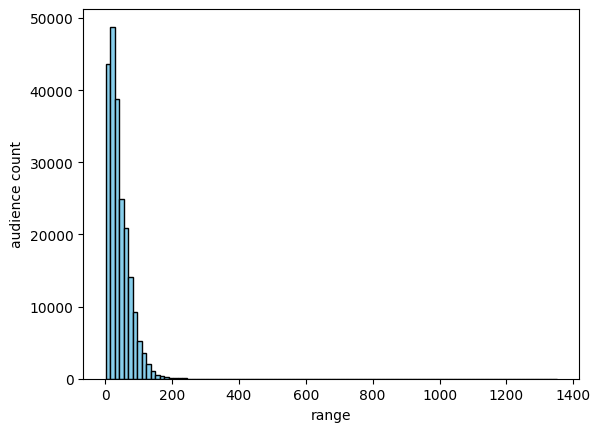

In [111]:
import matplotlib.pyplot as plt
plt.hist(booknow_visit['audience_count'],bins=100,color='skyblue',edgecolor='black')
plt.ylabel('audience count')
plt.xlabel('range')
plt.show()

In [112]:
booknow_visit['audience_count'].skew()   # skewness of audience count

2.602917396370386

In [113]:
# above plot shows audience count in booknow_visit file is highly right skewed.

### Time series forecasting depends on lag and rolling features. Let's add them.

In [114]:
df = deepcopy(booknow_visit.sort_values(['book_theater_id', 'show_date']).reset_index(drop=True))


#-------Date-based features-------
df['day_of_week'] = df['show_date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['month'] = df['show_date'].dt.month
df['year'] = df['show_date'].dt.year
df['day_of_year'] = df['show_date'].dt.day_of_year

#----------additional date features-----------
df['quarter'] = df['show_date'].dt.quarter
df['weekofyear'] = df['show_date'].dt.isocalendar().week.astype(int)

# -----------------Lag features---------------------
df['lag_7'] = df.groupby('book_theater_id')['audience_count'].shift(7)
df['lag_14'] = df.groupby('book_theater_id')['audience_count'].shift(14)
df['lag_28'] = df.groupby('book_theater_id')['audience_count'].shift(28)
df['lag_56'] = df.groupby('book_theater_id')['audience_count'].shift(56)

#------------- Rolling mean features-----------------
df['rolling_7_mean'] = df.groupby('book_theater_id')['audience_count'].shift(1).rolling(7).mean().reset_index(0, drop=True)
df['rolling_14_mean'] = df.groupby('book_theater_id')['audience_count'].shift(1).rolling(14).mean().reset_index(0, drop=True)
df['rolling_28_mean'] = df.groupby('book_theater_id')['audience_count'].shift(1).rolling(28).mean().reset_index(0, drop=True)
df['rolling_56_mean'] = df.groupby('book_theater_id')['audience_count'].shift(1).rolling(56).mean().reset_index(0, drop=True)


#-------------Rolling standard devation features-------------

df['rolling_7_std']=df.groupby('book_theater_id')['audience_count'].shift(1).rolling(7).std().reset_index(0, drop=True)
df['rolling_14_std']=df.groupby('book_theater_id')['audience_count'].shift(1).rolling(14).std().reset_index(0, drop=True)
df['rolling_28_std']=df.groupby('book_theater_id')['audience_count'].shift(1).rolling(28).std().reset_index(0, drop=True)
df['rolling_56_std']=df.groupby('book_theater_id')['audience_count'].shift(1).rolling(56).std().reset_index(0, drop=True)

In [115]:
df.isna().sum()

# lag features contains missing values.

book_theater_id        0
show_date              0
audience_count         0
day_of_week            0
is_weekend             0
month                  0
year                   0
day_of_year            0
quarter                0
weekofyear             0
lag_7               5771
lag_14             11539
lag_28             23046
lag_56             45891
rolling_7_mean      5771
rolling_14_mean    11539
rolling_28_mean    23046
rolling_56_mean    45891
rolling_7_std       5771
rolling_14_std     11539
rolling_28_std     23046
rolling_56_std     45891
dtype: int64

### handle the missing values in lag and rolling features in 'df'

In [116]:
# 1st few rows of each lag and rolling features will be missing. backward filling them for the specific id.

# List of lag and rolling features
lag_roll_cols = [
    'lag_7', 'lag_14', 'lag_28','lag_56',
    'rolling_7_mean', 'rolling_14_mean', 'rolling_28_mean','rolling_56_mean',
    'rolling_7_std', 'rolling_14_std', 'rolling_28_std', 'rolling_56_std'
]

lag_global_means = df[lag_roll_cols].mean()

# back filling missing values per theater
for col in lag_roll_cols:
    df[col] = df.groupby('book_theater_id')[col].bfill()

# If still NaN (meaning that theater has all NaNs), filling with global mean of that lag or rolling feature
for col in lag_roll_cols:
    if df[col].isna().sum()>0:
        df[col] = df[col].fillna(lag_global_means[col])

In [117]:
df.isna().sum().sum()   # no missing values in 'df' now.

0

### including theater meta data in 'df'

In [118]:
df=df.merge(theater_meta_merged,on='book_theater_id',how='left')

In [119]:
df.isna().mean()   # what percent of data missing in each column in df

book_theater_id    0.000000
show_date          0.000000
audience_count     0.000000
day_of_week        0.000000
is_weekend         0.000000
month              0.000000
year               0.000000
day_of_year        0.000000
quarter            0.000000
weekofyear         0.000000
lag_7              0.000000
lag_14             0.000000
lag_28             0.000000
lag_56             0.000000
rolling_7_mean     0.000000
rolling_14_mean    0.000000
rolling_28_mean    0.000000
rolling_56_mean    0.000000
rolling_7_std      0.000000
rolling_14_std     0.000000
rolling_28_std     0.000000
rolling_56_std     0.000000
theater_type       0.595722
theater_area       0.595722
dtype: float64

### Handle missing values in theater_type and area in 'df'
* huge number of ids in 'df' does not have any reference to theater meta data. Imputing them will create noise. So, I am filling the missing 
  ids with '0' and later label encoding them. This way model understands which ids don't have any reference. Same thing is done in prediction set also.

In [120]:
df['theater_type']=df['theater_type'].fillna('0')
df['theater_area']=df['theater_area'].fillna('0')

In [121]:
# adding a column 'is_holiday' in the dataframe

df['is_holiday']=df['show_date'].dt.normalize().isin(ind_holidays).astype(int)   # normalize() keeps the date part only removing the time component

### Label encoding theater_type and area

In [122]:
from sklearn.preprocessing import LabelEncoder
le_area=LabelEncoder()
le_type=LabelEncoder()
df['theater_type']=le_type.fit_transform(df['theater_type'])
df['theater_area']=le_area.fit_transform(df['theater_area'])

In [123]:
# sanity check for missing valus in df

df.isna().sum()

# no missing value in 'df' now.

book_theater_id    0
show_date          0
audience_count     0
day_of_week        0
is_weekend         0
month              0
year               0
day_of_year        0
quarter            0
weekofyear         0
lag_7              0
lag_14             0
lag_28             0
lag_56             0
rolling_7_mean     0
rolling_14_mean    0
rolling_28_mean    0
rolling_56_mean    0
rolling_7_std      0
rolling_14_std     0
rolling_28_std     0
rolling_56_std     0
theater_type       0
theater_area       0
is_holiday         0
dtype: int64

### Visualising weekend impact on audience count

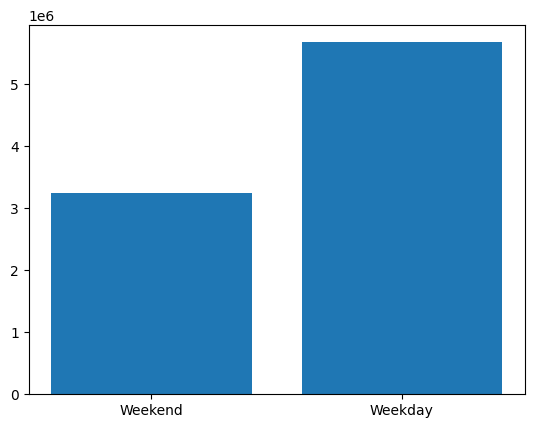

In [124]:
fig,ax=plt.subplots()
plt.bar(['Weekend','Weekday'],[
    df[df['is_weekend']==1]['audience_count'].sum(),
    df[df['is_weekend']==0]['audience_count'].sum()])
plt.show()

### More audience is recorded on weekdays than on weekends. This trend may be influenced by the locations of the theaters—possibly in areas where people do not follow typical big-city schedules, such as regular office or school routines, resulting in greater availability for weekday visits.

### Visualising holiday impact on audience count

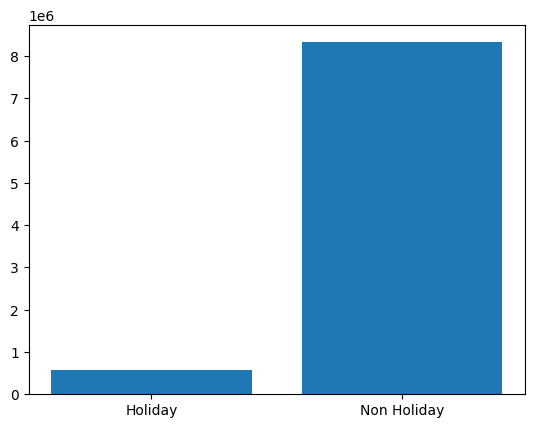

In [125]:
fig,ax=plt.subplots()
plt.bar(['Holiday','Non Holiday'],[
    df[df['is_holiday']==1]['audience_count'].sum(),
    df[df['is_holiday']==0]['audience_count'].sum()])
plt.show()

### Visualising holiday and weekend impact together

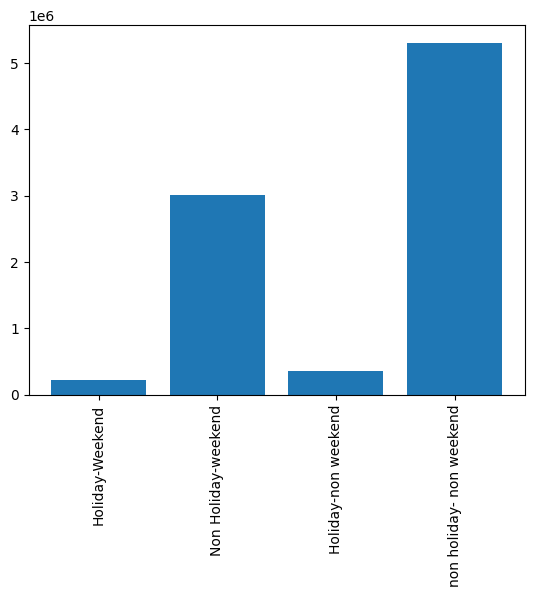

In [126]:
fig,ax=plt.subplots()
plt.bar(['Holiday-Weekend','Non Holiday-weekend','Holiday-non weekend','non holiday- non weekend'],[
    df[(df['is_holiday']==1) & (df['is_weekend']==1)]['audience_count'].sum(),
    df[(df['is_holiday']==0) & (df['is_weekend']==1)]['audience_count'].sum(),
    df[(df['is_holiday']==1) & (df['is_weekend']==0)]['audience_count'].sum(),
    df[(df['is_holiday']==0) & (df['is_weekend']==0)]['audience_count'].sum()])
plt.xticks(rotation=90)
plt.show()

### The above plots confirm that holiday impacts the audience count.

In [127]:
df.sort_values(['book_theater_id','show_date']).reset_index(drop=True,inplace=True)

In [128]:
# preparing the feature matrix and label matrix

X=df.drop(columns=['show_date','audience_count'])
y = df['audience_count']

In [129]:
X.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)

### encoding the book_theater_id column with the mean of audience count for each id for better grabbing the past audience trends.

In [130]:
# Mean audience per theater in 'df'
theater_mean = (
    pd.DataFrame({'book_theater_id': X['book_theater_id'], 'y': y})
    .groupby('book_theater_id')['y']
    .mean()
)


X['book_theater_id_enc'] = X['book_theater_id'].map(theater_mean)

# Handle unseen theaters in the prediction set. This is the global fallback for ids present in prediction set but not in 'df'.
global_mean1 = y.mean()

In [131]:
X1=deepcopy(X)   # will be used later in prediction_set

In [132]:
# Droping the original book_theater_id column.
X = X.drop(columns=['book_theater_id'])

In [133]:
# renaming book_theater_enc as book_theater_id
X=X.rename(columns={'book_theater_id_enc':'book_theater_id'})

### 1) Correlation heatmap

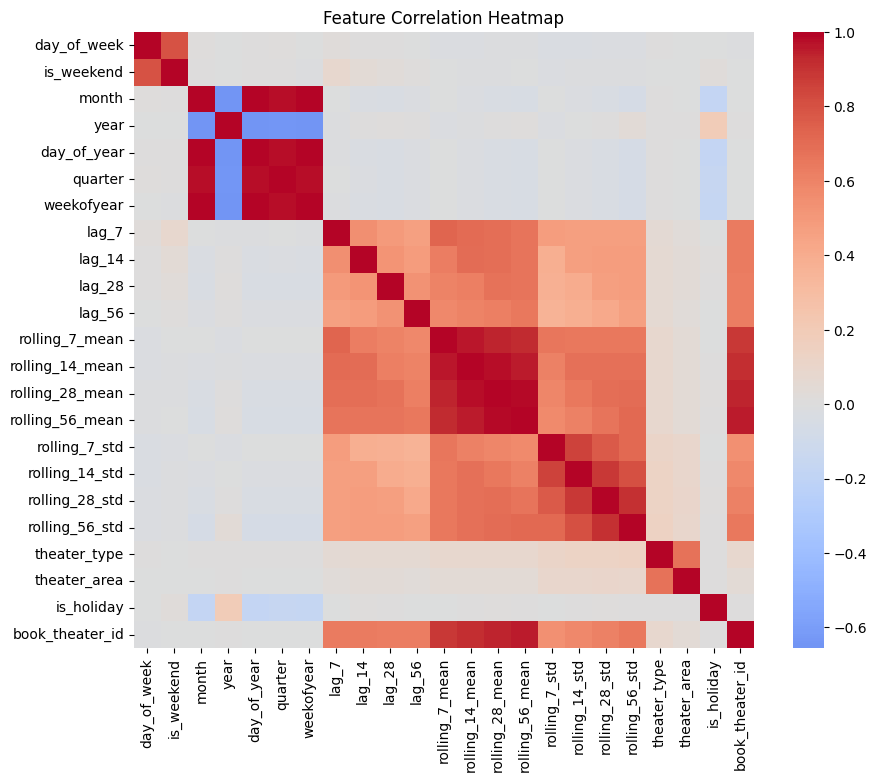

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()  # correlation among features
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [135]:
# correlation coefficient between target and features. Makes sure which features are important for the target.

X_target_corr = X.assign(target=y).corr()['target'].sort_values(ascending=False)
print(X_target_corr)

target             1.000000
rolling_28_mean    0.652521
rolling_14_mean    0.651092
rolling_56_mean    0.649292
rolling_7_mean     0.641312
book_theater_id    0.639808
lag_7              0.536628
lag_14             0.491579
lag_28             0.465584
rolling_56_std     0.452520
rolling_28_std     0.440070
lag_56             0.439552
rolling_14_std     0.423227
rolling_7_std      0.393233
is_weekend         0.140218
day_of_week        0.086477
theater_type       0.055196
theater_area       0.028138
day_of_year        0.010182
month              0.008783
weekofyear         0.008661
is_holiday         0.005236
quarter            0.004374
year              -0.024826
Name: target, dtype: float64


In [136]:
# Using SelectKBest and take most important features insteatd of all features together to avoid overfitting.

from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

In [137]:
# Importance (Score) of features used so far.

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)

            Feature          Score
13  rolling_28_mean  158714.392357
12  rolling_14_mean  157509.034625
14  rolling_56_mean  156005.510456
11   rolling_7_mean  149532.004832
22  book_theater_id  148345.432578
7             lag_7   86566.633339
8            lag_14   68205.487215
9            lag_28   59239.032740
18   rolling_56_std   55117.336849
17   rolling_28_std   51407.944886
10           lag_56   51258.000995
16   rolling_14_std   46705.781561
15    rolling_7_std   39152.370759
1        is_weekend    4292.736691
0       day_of_week    1612.755096
19     theater_type     654.097490
20     theater_area     169.598667
3              year     132.001272
4       day_of_year      22.192750
2             month      16.513701
6        weekofyear      16.058419
21       is_holiday       5.868899
5           quarter       4.094917


In [138]:
# selecting the most imp features according to the previous score

top_features=feature_scores.nlargest(13, 'Score')['Feature'].tolist()
top_features.extend(['theater_type','theater_area','is_weekend','is_holiday','year','day_of_year','month','day_of_week'])
X=X[top_features]

In [139]:
X.columns

Index(['rolling_28_mean', 'rolling_14_mean', 'rolling_56_mean',
       'rolling_7_mean', 'book_theater_id', 'lag_7', 'lag_14', 'lag_28',
       'rolling_56_std', 'rolling_28_std', 'lag_56', 'rolling_14_std',
       'rolling_7_std', 'theater_type', 'theater_area', 'is_weekend',
       'is_holiday', 'year', 'day_of_year', 'month', 'day_of_week'],
      dtype='object')

### feature scaling drops kaggle score of xgboost to 0.35 and lightgbm to 0.36 from 0.37+ for both of them. Random forest stays at 0.37. Hence dropping feature scaling.

In [140]:
#from sklearn.preprocessing import StandardScaler

In [141]:
#scale=StandardScaler()

In [142]:
#scaling_features=['book_theater_id','day_of_week','day_of_year','theater_area','theater_type','weekofyear','year','is_weekend','is_holiday']

In [143]:
### distributions of features to be scaled.

#for feature in scaling_features:
#    plt.hist(X[feature])
#    plt.show()

In [144]:
#for feature in scaling_features:
#    X[feature]=scale.fit_transform(np.array(X[feature]).reshape(-1,1))

### Model1: lightgbm

In [145]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

In [146]:
# using optuna for hyper parameter tuning. This uses baysean search and uses the previously found parameters to estimate the
# objecting term (here r2 score) as a fucntion of the parameters. Once the function is found, optuna gives the parameters for
# which r2 score is maximum. This a quite an intelligent approcah rathern than grid search and random search CV.
import optuna

In [147]:
# TiemSeries cross validation on entire data preserves the temopral sequence

from sklearn.model_selection import TimeSeriesSplit

In [148]:
"""
def objective1(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'n_jobs': -1,
        'objective': 'regression',
        'verbosity':-1,
        #'early_stopping':100    # used for avoiding overfitting
    }

    model = LGBMRegressor(**params)

    # Time series CV
    tscv = TimeSeriesSplit(n_splits=5)
    r2_scores = []

    for train_idx, val_idx in tscv.split(X):
        X_trainn, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_trainn, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(
                X_trainn, y_trainn,
                eval_set=(X_val, y_val),
                eval_metric='rmse'
            )

        y_pred = model.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        r2_scores.append(r2)

    return np.mean(r2_scores)

"""

"\ndef objective1(trial):\n    params = {\n        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),\n        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),\n        'max_depth': trial.suggest_int('max_depth', 3, 15),\n        'num_leaves': trial.suggest_int('num_leaves', 20, 200),\n        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),\n        'subsample': trial.suggest_float('subsample', 0.6, 1.0),\n        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),\n        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),\n        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),\n        'n_jobs': -1,\n        'objective': 'regression',\n        'verbosity':-1,\n        #'early_stopping':100    # used for avoiding overfitting\n    }\n\n    model = LGBMRegressor(**params)\n\n    # Time series CV\n    tscv = TimeSeriesSplit(n_splits=5)\n    r2_scores = []\n\n    for train_idx, val_idx in tscv

In [149]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

In [150]:
#study1 = optuna.create_study(direction='maximize',study_name='lightgbm regressor study')
#study1.optimize(objective1, n_trials=50, show_progress_bar=True)

In [151]:
#print("Best avg R2 Score:", study1.best_value)
#print("Best Parameters:")
#for key, value in study1.best_params.items():
#   print(f"  {key}: {value}")

In [152]:
"""
Lightgbm Best Parameters:
  n_estimators: 702
  learning_rate: 0.026028303778738236
  max_depth: 7
  num_leaves: 92
  min_child_samples: 38
  subsample: 0.7755703141206391
  colsample_bytree: 0.6969845187946989
  reg_alpha: 0.6589663933309529
  reg_lambda: 0.9977678470379436
"""

'\nLightgbm Best Parameters:\n  n_estimators: 702\n  learning_rate: 0.026028303778738236\n  max_depth: 7\n  num_leaves: 92\n  min_child_samples: 38\n  subsample: 0.7755703141206391\n  colsample_bytree: 0.6969845187946989\n  reg_alpha: 0.6589663933309529\n  reg_lambda: 0.9977678470379436\n'

In [153]:
#best_params=study1.best_params
#best_params['verbose']=-1
#best_params['n_jobs']=-1
#model1 = LGBMRegressor(
#        **best_params
#    )

In [154]:
"""
# 5 fold time series cross validation on the entire dataset

tscv=TimeSeriesSplit(n_splits=5)
fold=1
for train_idx, val_idx in tscv.split(X):
    X_trainn, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_trainn, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model2.fit(
                X_trainn, y_trainn,
                eval_set=[(X_val, y_val)],
                verbose=False
            )

    y_pred = model1.predict(X_val)
    r2 = r2_score(y_val, y_pred)

    print(f"r2 score on fold_{fold} is: {r2}")
    fold+=1

"""

'\n# 5 fold time series cross validation on the entire dataset\n\ntscv=TimeSeriesSplit(n_splits=5)\nfold=1\nfor train_idx, val_idx in tscv.split(X):\n    X_trainn, X_val = X.iloc[train_idx], X.iloc[val_idx]\n    y_trainn, y_val = y.iloc[train_idx], y.iloc[val_idx]\n\n    model2.fit(\n                X_trainn, y_trainn,\n                eval_set=[(X_val, y_val)],\n                verbose=False\n            )\n\n    y_pred = model1.predict(X_val)\n    r2 = r2_score(y_val, y_pred)\n\n    print(f"r2 score on fold_{fold} is: {r2}")\n    fold+=1\n\n'

In [155]:
#model1.fit(X,y)    # training the model on entire data

### Importance of each feature

In [156]:
#import lightgbm as lgb
#lgb.plot_importance(model1, importance_type='gain')

### Model 2: Xgboost

In [157]:
from xgboost import XGBRegressor

In [158]:
def objective2(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'random_state': 42,
        'n_jobs': -1,
        'eval_metric':'rmse'
    }

    model = XGBRegressor(**params)

    tscv=TimeSeriesSplit(n_splits=5)
    r2_scores=[]

    for train_idx, val_idx in tscv.split(X):
        X_trainn, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_trainn, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(
                X_trainn, y_trainn,
                eval_set=[(X_val, y_val)],
                verbose=False
            )

        y_pred = model.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        r2_scores.append(r2)

    return np.mean(r2_scores)

In [159]:
# run the optuna study

study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, n_trials=50, show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [160]:
# check the best results

print("Best R2 Score:", study2.best_value)
print("Best Parameters:")
for key, value in study2.best_params.items():
    print(f"  {key}: {value}")

Best R2 Score: 0.5142869236176569
Best Parameters:
  n_estimators: 459
  learning_rate: 0.018264892932681978
  max_depth: 6
  subsample: 0.81886886941949
  colsample_bytree: 0.8169139661935111
  gamma: 4.283712978759953
  min_child_weight: 8
  reg_alpha: 0.8429236497933986
  reg_lambda: 0.13167649979836035


In [161]:
"""
XgBoost best parameters

n_estimators: 689
  learning_rate: 0.014225065862602202
  max_depth: 8
  subsample: 0.9677594086189887
  colsample_bytree: 0.9176780993472303
  gamma: 1.6359914019192172
  min_child_weight: 10
  reg_alpha: 0.6843989792957659
  reg_lambda: 0.12067223197604568

"""

'\nXgBoost best parameters\n\nn_estimators: 689\n  learning_rate: 0.014225065862602202\n  max_depth: 8\n  subsample: 0.9677594086189887\n  colsample_bytree: 0.9176780993472303\n  gamma: 1.6359914019192172\n  min_child_weight: 10\n  reg_alpha: 0.6843989792957659\n  reg_lambda: 0.12067223197604568\n\n'

In [162]:
best_params2=study2.best_params
best_params2['verbose']=-1
best_params2['n_jobs']=-1
model2 = XGBRegressor(
        **best_params2
    )

In [163]:
# 5 fold time series cross validation on the entire dataset

tscv=TimeSeriesSplit(n_splits=5)
fold=1
for train_idx, val_idx in tscv.split(X):
    X_trainn, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_trainn, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model2.fit(
                X_trainn, y_trainn,
                eval_set=[(X_val, y_val)],
                verbose=False
            )

    y_pred = model2.predict(X_val)
    r2 = r2_score(y_val, y_pred)

    print(f"r2 score on fold_{fold} is: {r2}")
    fold+=1

r2 score on fold_1 is: 0.47128556148729805
r2 score on fold_2 is: 0.5234568025238988
r2 score on fold_3 is: 0.4824631634222283
r2 score on fold_4 is: 0.5444977614766184
r2 score on fold_5 is: 0.5525986700131993


In [164]:
model2.fit(X, y)     # finally training on entire data to capture details of each and every id.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8169139661935111, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=4.283712978759953,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.018264892932681978,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=459, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

### Importance of features

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

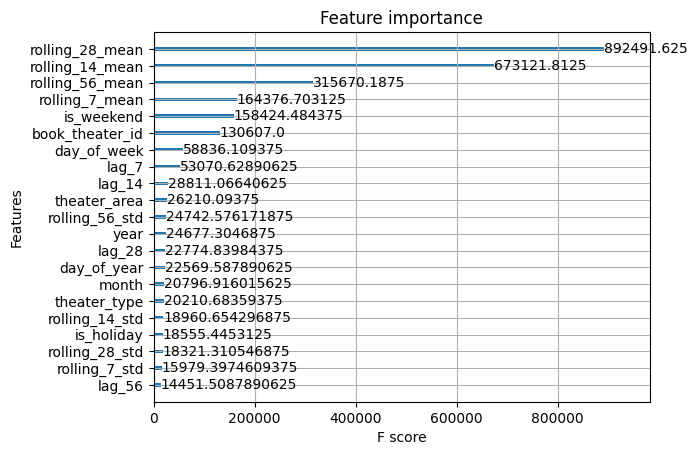

In [165]:
import xgboost
xgboost.plot_importance(model2, importance_type='gain')

### Model 3: Random forest regressor

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:

def objective3(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.3, 0.5, 0.7, 1.0]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestRegressor(**params)

    model.fit(X_train,y_train)

    r2=r2_score(y_test,model.predict(X_test))
    return r2

In [168]:
#study3 = optuna.create_study(direction='maximize', study_name='rf_regressor')
#study3.optimize(objective3, n_trials=50, show_progress_bar=True)

In [169]:
# check the best results

#print("Best R2 Score:", study3.best_value)
#print("Best Parameters:")
#for key, value in study3.best_params.items():
#    print(f"  {key}: {value}")

In [170]:
"""
 random forest Best Parameters:
  n_estimators: 766
  max_depth: 22
  min_samples_split: 8
  min_samples_leaf: 5
  max_features: log2
  bootstrap: True
"""

'\n random forest Best Parameters:\n  n_estimators: 766\n  max_depth: 22\n  min_samples_split: 8\n  min_samples_leaf: 5\n  max_features: log2\n  bootstrap: True\n'

In [171]:
#best_params3=study3.best_params
#best_params3['verbose']=0
#best_params3['n_jobs']=-1
#model3 = RandomForestRegressor(
#        **best_params3
#    )

In [172]:
# 5 fold time series cross validation on the entire dataset

"""
tscv=TimeSeriesSplit(n_splits=5)
fold=1
for train_idx, val_idx in tscv.split(X):
    X_trainn, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_trainn, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model2.fit(
                X_trainn, y_trainn,
                eval_set=[(X_val, y_val)],
                verbose=False
            )

    y_pred = model3.predict(X_val)
    r2 = r2_score(y_val, y_pred)

    print(f"r2 score on fold_{fold} is: {r2}")
    fold+=1

"""

'\ntscv=TimeSeriesSplit(n_splits=5)\nfold=1\nfor train_idx, val_idx in tscv.split(X):\n    X_trainn, X_val = X.iloc[train_idx], X.iloc[val_idx]\n    y_trainn, y_val = y.iloc[train_idx], y.iloc[val_idx]\n\n    model2.fit(\n                X_trainn, y_trainn,\n                eval_set=[(X_val, y_val)],\n                verbose=False\n            )\n\n    y_pred = model3.predict(X_val)\n    r2 = r2_score(y_val, y_pred)\n\n    print(f"r2 score on fold_{fold} is: {r2}")\n    fold+=1\n\n'

In [173]:
#model3.fit(X,y)    # finally training on entire data to capture details of each and every id.

### prepare the prediction set

In [174]:
# adding time based features in prediction set from 'show_date' column
# used in training set

prediction_set['show_date'] = pd.to_datetime(prediction_set['show_date'])
prediction_set['day_of_week'] = prediction_set['show_date'].dt.dayofweek
prediction_set['is_weekend'] = (prediction_set['day_of_week'].isin([5,6])).astype(int)
prediction_set['month'] = prediction_set['show_date'].dt.month
prediction_set['is_holiday']=prediction_set['show_date'].dt.normalize().isin(ind_holidays).astype(int)
prediction_set['year']=prediction_set['show_date'].dt.year
prediction_set['day_of_year']=prediction_set['show_date'].dt.day_of_year
#prediction_set['weekofyear'] = prediction_set['show_date'].dt.isocalendar().week.astype(int)

In [175]:
#   checking the features added so far in prediciton_set

prediction_set.columns

Index(['book_theater_id', 'show_date', 'day_of_week', 'is_weekend', 'month',
       'is_holiday', 'year', 'day_of_year'],
      dtype='object')

In [176]:
# fetching encoded ids from 'df'
encoded_ids = X1[['book_theater_id', 'book_theater_id_enc']].drop_duplicates()
prediction_set = prediction_set.merge(encoded_ids, on='book_theater_id', how='left')

In [177]:
# if any id of prediction set is completely missing in df, then apply the global fallback.
prediction_set['book_theater_id_enc']=prediction_set['book_theater_id_enc'].fillna(global_mean1)

In [178]:
prediction_set=prediction_set.rename(columns={'book_theater_id':'id','book_theater_id_enc':'book_theater_id'})

In [179]:
# merging prediction_set with theater_meta_merged to fetch theater type and area information
prediction_set=prediction_set.merge(theater_meta_merged,left_on='id',right_on='book_theater_id',how='left')

In [180]:
# above method creates 'book_theater_id_x' and 'book_theater_id_y' bcz of the common feature name in both the dataset
prediction_set.rename(columns={'book_theater_id_x':'book_theater_id'},inplace=True)

In [181]:
prediction_set.drop(columns=['book_theater_id_y'],inplace=True)

In [182]:
# impute the missing values in theater_type and area
prediction_set['theater_type']=prediction_set['theater_type'].fillna('0')
prediction_set['theater_area']=prediction_set['theater_area'].fillna('0')

In [183]:
e_a,e_t=LabelEncoder(),LabelEncoder()
prediction_set['theater_type']=e_t.fit_transform(prediction_set['theater_type'])
prediction_set['theater_area']=e_a.fit_transform(prediction_set['theater_area'])

In [184]:
prediction_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38062 entries, 0 to 38061
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               38062 non-null  object        
 1   show_date        38062 non-null  datetime64[ns]
 2   day_of_week      38062 non-null  int32         
 3   is_weekend       38062 non-null  int64         
 4   month            38062 non-null  int32         
 5   is_holiday       38062 non-null  int64         
 6   year             38062 non-null  int32         
 7   day_of_year      38062 non-null  int32         
 8   book_theater_id  38062 non-null  float64       
 9   theater_type     38062 non-null  int64         
 10  theater_area     38062 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(4), object(1)
memory usage: 2.6+ MB


In [185]:
prediction_set.columns

Index(['id', 'show_date', 'day_of_week', 'is_weekend', 'month', 'is_holiday',
       'year', 'day_of_year', 'book_theater_id', 'theater_type',
       'theater_area'],
      dtype='object')

In [186]:
X.columns

Index(['rolling_28_mean', 'rolling_14_mean', 'rolling_56_mean',
       'rolling_7_mean', 'book_theater_id', 'lag_7', 'lag_14', 'lag_28',
       'rolling_56_std', 'rolling_28_std', 'lag_56', 'rolling_14_std',
       'rolling_7_std', 'theater_type', 'theater_area', 'is_weekend',
       'is_holiday', 'year', 'day_of_year', 'month', 'day_of_week'],
      dtype='object')

In [187]:
#for feature in scaling_features:
#    prediction_set[feature]=scale.fit_transform(np.array(prediction_set[feature]).reshape(-1,1))

### Prediciting audience count. Lag features can't be directly calculated in prediction set as they depend on audience count. That's why using an auto regressive task is important where each row's audience count will be calculated from past data and these counts will be used in later dates.

In [188]:
from collections import deque
import time

# --- Sort data ---
df = df.sort_values(['book_theater_id', 'show_date']).reset_index(drop=True)
prediction_set = prediction_set.sort_values(['id', 'show_date']).reset_index(drop=True)

# --- fallback statistics ---

mean_lag_7 = df['lag_7'].mean()
mean_lag_14 = df['lag_14'].mean()
mean_lag_28 = df['lag_28'].mean()
mean_lag_56 = df['lag_56'].mean()

mean_roll7_mean = df['rolling_7_mean'].mean()
mean_roll14_mean = df['rolling_14_mean'].mean()
mean_roll28_mean = df['rolling_28_mean'].mean()
mean_roll56_mean = df['rolling_56_mean'].mean()

mean_roll7_std = df['rolling_7_std'].mean()
mean_roll14_std = df['rolling_14_std'].mean()
mean_roll28_std = df['rolling_28_std'].mean()
mean_roll56_std = df['rolling_56_std'].mean()


global_mean=df['audience_count'].mean()


predictions = []

count=1

# --- Iterate theater-wise ---
for theater_id, future_df in prediction_set.groupby('id'):
    # --- Historical data fetch ---
    if theater_id in df['book_theater_id'].values:
        hist = df.loc[df['book_theater_id'] == theater_id, ['show_date', 'audience_count']].copy()
    
    else:
        # If theater not in training, simulate 56 days of history using global mean
        hist = pd.DataFrame({
            'show_date': pd.date_range(
                start=future_df['show_date'].min() - pd.Timedelta(days=56),
                end=future_df['show_date'].min() - pd.Timedelta(days=1)
            ),
            'audience_count': [global_mean] * 56
        })

    # ---making a Rolling window for maximum days ---
    window = deque(hist['audience_count'].tail(56).tolist(), maxlen=56)
    date_index = dict(zip(hist['show_date'], hist['audience_count']))

    # --- Predict day by day ---
    for date in future_df['show_date']:
        # ---- Lag features ----
        lag_7 = date_index.get(date - pd.Timedelta(days=7), np.nan)
        lag_14 = date_index.get(date - pd.Timedelta(days=14), np.nan)
        lag_28 = date_index.get(date - pd.Timedelta(days=28), np.nan)
        lag_56 = date_index.get(date - pd.Timedelta(days=56), np.nan)

        # ---- Rolling mean features----
        arr = np.array(list(window))
        rolling_7_mean = np.mean(arr[-7:]) if len(arr) >= 7 else np.nan
        rolling_14_mean = np.mean(arr[-14:]) if len(arr) >= 14 else np.nan
        rolling_28_mean = np.mean(arr[-28:]) if len(arr) >= 28 else np.nan
        rolling_56_mean = np.mean(arr[-56:]) if len(arr) >= 56 else np.nan

        # ---- Rolling std features----
        rolling_7_std = np.std(arr[-7:], ddof=1) if len(arr) >= 7 else np.nan
        rolling_14_std = np.std(arr[-14:], ddof=1) if len(arr) >= 14 else np.nan
        rolling_28_std = np.std(arr[-28:], ddof=1) if len(arr) >= 28 else np.nan
        rolling_56_std = np.std(arr[-56:], ddof=1) if len(arr) >= 56 else np.nan

        
        row = future_df.loc[future_df['show_date'] == date].copy()

        

        row['lag_7'] = lag_7
        row['lag_14'] = lag_14
        row['lag_28'] = lag_28
        row['lag_56'] = lag_56
        row['rolling_7_mean'] = rolling_7_mean
        row['rolling_14_mean'] = rolling_14_mean
        row['rolling_28_mean'] = rolling_28_mean
        row['rolling_56_mean'] = rolling_56_mean
        row['rolling_7_std'] = rolling_7_std
        row['rolling_14_std'] = rolling_14_std
        row['rolling_28_std'] = rolling_28_std
        row['rolling_56_std'] = rolling_56_std

        # ---- Handle missing data ----
        fill_values = {
            'lag_7': mean_lag_7,
            'lag_14': mean_lag_14,
            'lag_28': mean_lag_28,
            'lag_56': mean_lag_56,
            'rolling_7_mean': mean_roll7_mean,
            'rolling_14_mean': mean_roll14_mean,
            'rolling_28_mean': mean_roll28_mean,
            'rolling_56_mean': mean_roll56_mean,
            'rolling_7_std': mean_roll7_std,
            'rolling_14_std': mean_roll14_std,
            'rolling_28_std': mean_roll28_std,
            'rolling_56_std': mean_roll56_std
        }

        row = row.fillna(fill_values)

        
        feature_cols = list(X.columns)

        # ---- Model prediction ----
        try:
            row['audience_count'] = model2.predict(row[feature_cols])[0]
        except Exception as e:
            # emergency fallback if unexpected NaN or unseen pattern
            row['audience_count'] = global_mean

        # ---- Update rolling state ----
        val = row['audience_count'].iloc[0]
        window.append(val)
        date_index[date] = val

        # ---- Collect prediction ----
        predictions.append(row)


# --- Combine all predictions -----
pred_df = pd.concat(predictions, ignore_index=True)

In [189]:
pred_df_copy=deepcopy(pred_df)

In [190]:
pred_df['audience_count'] = pred_df['audience_count'].round().astype(int)



pred_df['ID'] = (
    pred_df['id'].astype(str) + '_' +
    pred_df['show_date'].astype(str)
)

submission_df = pred_df[['ID', 'audience_count']].copy()

In [191]:
submission_df.shape

(38062, 2)

In [192]:
submission_df.head()

,ID,audience_count
0,book_00001_2024-03-01,36
1,book_00001_2024-03-02,60
2,book_00001_2024-03-03,63
3,book_00001_2024-03-04,46
4,book_00001_2024-03-06,33


In [193]:
submission_df.to_csv('/kaggle/working/submission.csv',index=False)

### Comparisons of models

1) r2 score on train set

    lightgbm - 0.5897

    xgboost - 0.6314

    randomforest - 0.7198


2) r2 score on test set

    lightgbm - 0.5617

    xgboost - 0.5598

    randomforest - 0.5507


3) kaggle leaderboard score

    lightgbm - 0.36886 (without feature scaling)

    xgboost - 0.36919 (without feature scaling)

    randomforest - 0.37292 (without feature scaling)


* feature scaling drops kaggle score of xgboost to 0.35 and lightgbm to 0.36 from 0.37+ for both of them. Random forest stays at 0.37. Hence dropping feature scaling.